In [1]:
# 计算给定数据集的熵
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
        
    shannonEnt = 0.0 #初始化熵为0
    
    for key in labelCounts:
        prob = float(labelCounts[key])/float(numEntries)
        shannonEnt -= prob * log(prob,2)
        
    return shannonEnt        

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    
    return dataSet, labels 

In [3]:
myDat, labels = createDataSet()

In [4]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
calcShannonEnt(myDat)

0.9709505944546686

In [6]:
# 熵越高，混合的数据越多
# 往数据集中添加更多分类，观察熵的变化
myDat[0][-1] = 'maybe'

In [7]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [8]:
calcShannonEnt(myDat)

1.3709505944546687

In [9]:
# 按给定特征划分数据集

# @dataSet:待划分的数据集
# @axis:划分数据集的特征
# @value:特征的取值
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            # extend()是将另外一个列表中的元素（以列表中元素为对象）一一添加到当前列表中，构成一个列表
            # 比如a=[1,2,3],b=[4,5,6],则a.extend(b)=[1,2,3,4,5,6]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
            
    return retDataSet

In [10]:
# 演示extend()和append()的不同
a = [1, 2, 3]
b = [4, 5, 6]
a.append(b)

In [11]:
a

[1, 2, 3, [4, 5, 6]]

In [12]:
a = [1, 2, 3]
b = [4, 5, 6]
a.extend(b)

In [13]:
a

[1, 2, 3, 4, 5, 6]

In [14]:
splitDataSet(myDat, 0, 1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [15]:
splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

In [16]:
# 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain, bestFeature = 0.0, -1
    
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        # 利用set集合的性质--元素的唯一性，得到特征i的取值
        uniqueVals = set(featList)
        newEntropy = 0.0
        
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            
        infoGain = baseEntropy - newEntropy
        if infoGain>bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
            
    return bestFeature  

In [17]:
chooseBestFeatureToSplit(myDat)

0

In [18]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [19]:
# 定义多数表决函数（当遍历完所有的特征属性后，类标签仍然不唯一，如何定义该叶子节点）
import operator

def majorityCnt(classList):
    classCount = {}
    
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
        
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedClassCount[0][0]

In [20]:
# 创建树的代码
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    # list.count(obj)计数列表中对象obj
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 遍历完所有的特征属性，此时数据集只剩1列，即只有类标签列
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    # 复制labels列表，改变subLabels同时不改变Labels
    subLabels = labels[:]
    del(subLabels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    
    for value in uniqueVals:
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        
    return myTree

In [21]:
myDat, labels = createDataSet()

In [22]:
myTree = createTree(myDat, labels)

In [23]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [24]:
# 使用文本直接绘制树节点
import matplotlib.pyplot as plt

# 通过创建字典保存相关参数值
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    # annotate在图形中添加注释
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', 
                           xytext=centerPt, textcoords='axes fraction',
                           va='center', ha='center', bbox=nodeType, arrowprops=arrow_args)
    
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf() # 清空figure
    createPlot.ax1 = plt.subplot(111, frameon=False) # creatPlot.ax1通过函数属性实现全局变量
    plotNode('a decsion node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.6), leafNode)
    plt.show()

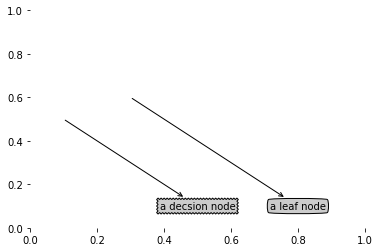

In [25]:
createPlot()

In [26]:
# 获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0] # 注意使用list()，否则无法通过索引调用
    secondDict = myTree[firstStr]
    
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict': # type()中的__name__属性,可用isinstance(obj,dict)
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1

    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
            
    return maxDepth

In [27]:
# 预先存储树信息
def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [28]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [29]:
myTree = retrieveTree(0)

In [30]:
getNumLeafs(myTree)

3

In [31]:
getTreeDepth(myTree)

2

In [32]:
# 绘制树
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString) # .text添加文本信息
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    # def fun(**kwargs) 允许将一个键值对的可变数量的参数字典传递给一个函数
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

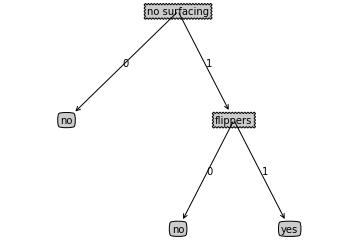

In [33]:
myTree = retrieveTree(0)
createPlot(myTree)

In [34]:
myTree['no surfacing'][3] = 'maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

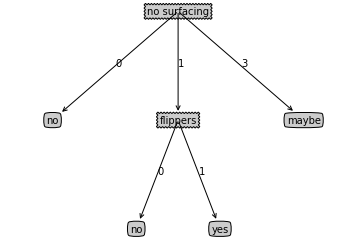

In [35]:
createPlot(myTree)

In [36]:
# 使用决策树的分类函数

# @intputTree 构建好的决策树
# @featLabels 特征标签列表
# @testVec 测试实例
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr) # 根据分类特征的索引找到对应的标称型数据值
    
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
                
    return classLabel

In [40]:
myDat, labels = createDataSet()

In [41]:
labels

['no surfacing', 'flippers']

In [42]:
myTree = retrieveTree(0)

In [43]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [44]:
classify(myTree, labels, [1,0])

'no'

In [48]:
classify(myTree, labels, [1,1])

'yes'

In [54]:
# 使用pickle模块存储决策树

# pickle模块存储决策树
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb+') # pickle存储方式默认是二进制方式；wb+表示读写打开或建立一个二进制文件，允许读和写，wb只写
    pickle.dump(inputTree, fw) # 序列化
    fw.close()

# 取决策树操作 
def grabTree(filename):
    import pickle
    fr = open(filename, 'rb+') # 对应于二进制方式写入数据，'rb+'采用二进制形式读出数据
    return pickle.load(fr) # 反序列化

In [55]:
storeTree(myTree, 'classifierStorage.txt')

In [56]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

示例：使用决策树预测隐形眼镜类型

In [57]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)

In [58]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

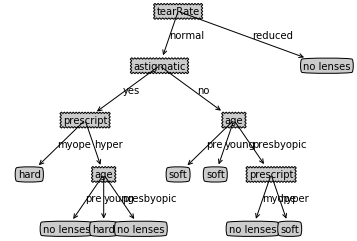

In [59]:
createPlot(lensesTree)